In [1]:
%matplotlib inline
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt

import pygem
print(pygem.__version__)
from pygem import FFD

2.0.0


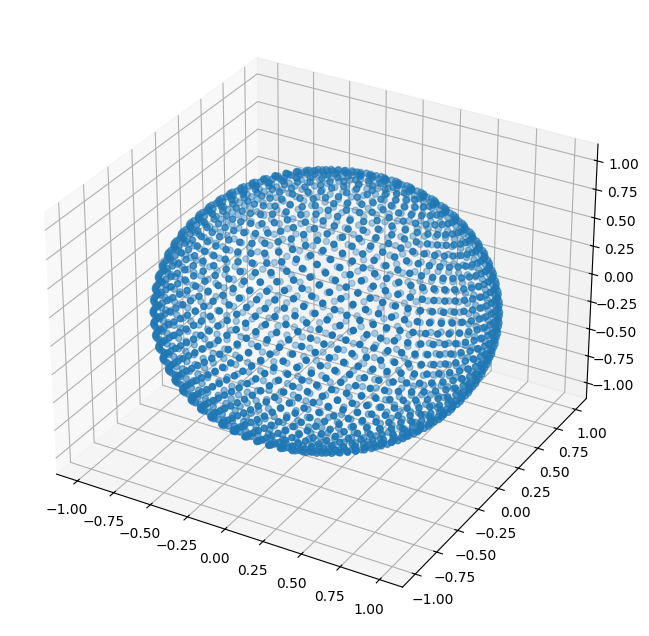

In [2]:
def mesh_points(num_pts = 2000):
    indices = np.arange(0, num_pts, dtype=float) + 0.5

    phi = np.arccos(1 - 2*indices/num_pts)
    theta = np.pi * (1 + 5**0.5) * indices

    return np.array([np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)]).T

mesh = mesh_points()
plt.figure(figsize=(8,8)).add_subplot(111, projection='3d').scatter(*mesh.T);
plt.show()

In [3]:
ffd = FFD([2, 2, 2])
print(ffd)

conversion_unit = 1.0
n_control_points = [2 2 2]

box_length = [1. 1. 1.]
box_origin = [0. 0. 0.]
rot_angle  = [0. 0. 0.]

array_mu_x =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_y =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_z =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

rotation_matrix = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

position_vertices = [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



In [4]:
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

ffd.array_mu_x[1, 1, 1] = 2
ffd.array_mu_z[1, 1, 1] = 0.8
print()
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

Movements of point[1, 1, 1] along x: 0.0
Movements of point[1, 1, 1] along z: 0.0

Movements of point[1, 1, 1] along x: 2.0
Movements of point[1, 1, 1] along z: 0.8


In [5]:
new_mesh = ffd(mesh)
print(type(new_mesh), new_mesh.shape)

<class 'numpy.ndarray'> (2000, 3)


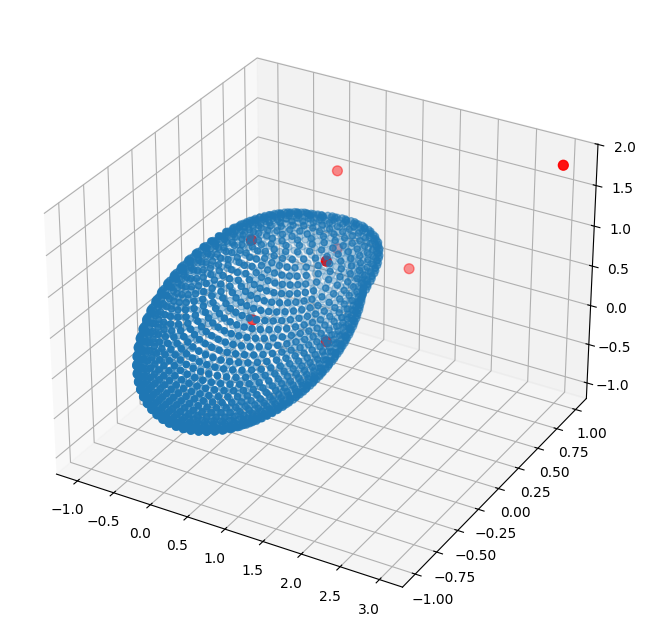

In [6]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(*new_mesh.T)
ax.scatter(*ffd.control_points().T, s=50, c='red')
plt.show()